In [11]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import os
from tensorflow.keras import layers, models
import cv2
import mediapipe as mp
from tkinter import*
from PIL import Image, ImageTk
import time

In [ ]:
# import os
# import cv2
# import numpy as np
# import pickle

# # Initialize MediaPipe Hands
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# # Function to extract hand landmark coordinates from RGB images
# def extract_landmarks(image):
#     # Convert image to RGB
#     rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # Process image to detect hand landmarks
#     results = hands.process(rgb_image)
    
#     # If hand landmarks are detected
#     if results.multi_hand_landmarks:
#         hand_landmarks = results.multi_hand_landmarks[0]  # Assuming only one hand is detected
#         landmark_coords = []
#         for landmark in hand_landmarks.landmark:
#             # Extract X and Y coordinates of each landmark
#             landmark_coords.append((landmark.x, landmark.y))
#         return np.array(landmark_coords)
#     else:
#         return None

# # Function to load images and extract landmarks and labels
# def load_data(dataset_dir, save_file="test_data.pkl"):
#     data = []
#     labels = []
    
#     # Mapping from uppercase letters to numbers
#     letter_to_number = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
#                         'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18,
#                         'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'space': 26}
    
#     # Check if the data has been saved before
#     if os.path.exists(save_file):
#         with open(save_file, 'rb') as f:
#             saved_data = pickle.load(f)
#             return saved_data
    
#     for letter_folder in os.listdir(dataset_dir):
#         letter_path = os.path.join(dataset_dir, letter_folder)
#         # Skip non-directory files, such as .DS_Store
#         if not os.path.isdir(letter_path):
#             continue
#         for filename in os.listdir(letter_path):
#             if filename.endswith(".jpg") or filename.endswith(".png"):
#                 # Read the image
#                 image_path = os.path.join(letter_path, filename)
#                 image = cv2.imread(image_path)
                
#                 # Extract hand landmarks
#                 landmarks = extract_landmarks(image)
                
#                 if landmarks is not None:
#                     # Map letter to number
#                     label_number = letter_to_number[letter_folder]
#                     data.append(landmarks)
#                     labels.append(label_number)
    
#     # Save the extracted data
#     with open(save_file, 'wb') as f:
#         pickle.dump((np.array(data), np.array(labels)), f)
    
#     return np.array(data), np.array(labels)

# # # Load the data
# # data, labels = load_data("asl_alphabet_train")


In [2]:
import pickle

# Load the saved data from the pickle file
with open("train_data.pkl", 'rb') as f:
    saved_data = pickle.load(f)

# Extract the data and labels from the loaded data
train_data, train_labels = saved_data


In [3]:
# Define the CNN-MediaPipe architecture
def create_cnn_mediapipe_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(27, activation='softmax'))

    return model

# Determine input shape based on the shape of the extracted landmarks
input_shape = train_data.shape[1:]  # Shape excluding the batch size dimension
cnn_mediapipe_model = create_cnn_mediapipe_model(input_shape)

# Create the model with the provided input shape
cnn_mediapipe_model = create_cnn_mediapipe_model(input_shape)

# Compile the model
cnn_mediapipe_model.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

/Users/shaylawalley/anaconda3/envs/neural_networks/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
# Train the model
cnn_mediapipe_model.fit(train_data, train_labels, epochs=45, batch_size=32)

Epoch 1/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.2969 - loss: 2.4166
Epoch 2/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.7796 - loss: 0.7564
Epoch 3/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.8329 - loss: 0.5980
Epoch 4/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.8516 - loss: 0.5320
Epoch 5/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.8654 - loss: 0.4859
Epoch 6/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.8778 - loss: 0.4346
Epoch 7/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.8798 - loss: 0.4200
Epoch 8/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.8910 - loss: 0.3823
Epoch 9/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.8923 - loss: 0.3753
Epoch 10/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.9001 - loss: 0.3523
Epoch 11/45
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.9039 - loss: 0.3404
Epoch 12

In [5]:
import pickle

# Load the saved data from the pickle file
with open("test_data.pkl", 'rb') as f:
    saved_data = pickle.load(f)

# Extract the data and labels from the loaded data
test_data, test_labels = saved_data

In [6]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_mediapipe_model.evaluate(test_data, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9448 - loss: 0.1742
Test Loss: 0.16249540448188782
Test Accuracy: 0.950872540473938


330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


/var/folders/3k/xw6qw15s5zb611bx7g_40kj80000gn/T/ipykernel_63173/1060834148.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


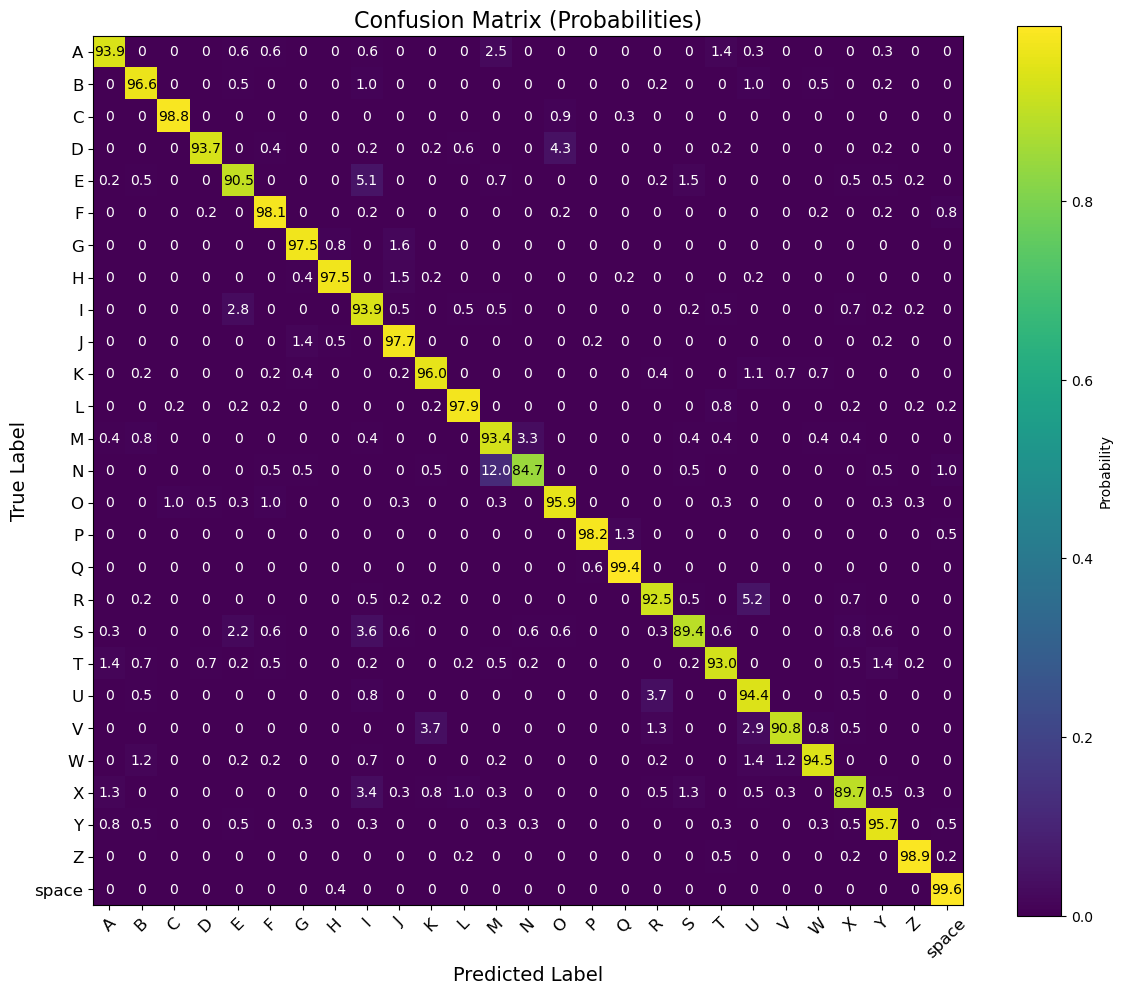

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

# Define letter labels and space for index 26
letter_labels = [chr(ord('A') + i) for i in range(26)]
letter_labels.append('space')

# Make predictions using the model
y_pred_prob = cnn_mediapipe_model.predict(test_data)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, np.argmax(y_pred_prob, axis=1), normalize='true')

# Plot the confusion matrix with probabilities as text
plt.figure(figsize=(12, 10))
plt.title('Confusion Matrix (Probabilities)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(np.arange(27), letter_labels, fontsize=12, rotation=45)
plt.yticks(np.arange(27), letter_labels, fontsize=12)

# Add a color gradient based on probabilities
cmap = plt.cm.get_cmap('viridis')
plt.imshow(conf_matrix, cmap=cmap)

# Add text with probabilities
for i in range(27):
    for j in range(27):
        text_color = 'white' if conf_matrix[i, j] < 0.5 else 'black'  # Choose text color based on contrast
        prob_text = f'{conf_matrix[i, j]*100:.1f}' if conf_matrix[i, j] > 0 else '0'
        plt.text(j, i, prob_text, ha='center', va='center', color=text_color, fontsize=10)

plt.colorbar(label='Probability')  # Add colorbar
plt.tight_layout()
plt.show()


In [8]:
def detect_right_hand_up(landmarks):
    # Check if the thumb tip landmark is above the other fingers
    if landmarks[8, 1] < min(landmarks[5:8, 1]):
        return True
    return False

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

def extract_landmarks(image):
    # Convert image to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process image to detect hand landmarks
    results = hands.process(rgb_image)

    print("results: ")
    print(results.multi_hand_landmarks)
    # print(results.multi_handedness)
    
    # Initialize an empty dictionary to store landmarks for each hand
    landmarks_dict = {"Left": None, "Right": None}
    
    # If hand landmarks are detected
    if results.multi_hand_landmarks:

        # Iterate through each detected hand
        for hand_landmarks in results.multi_hand_landmarks:
            # Get the hand type (left or right)
            hand_type = "Right" if hand_landmarks.landmark[0].x < hand_landmarks.landmark[20].x else "Left"
            
            # Extract X and Y coordinates of each landmark for the current hand
            landmark_coords = np.array([(landmark.x, landmark.y) for landmark in hand_landmarks.landmark])
            
            # Store the landmarks in the dictionary based on hand type
            landmarks_dict[hand_type] = landmark_coords
    
    return landmarks_dict


def get_frame_info(frame):
    # Accessing hand landmarks
    landmarks = extract_landmarks(frame)
    # print(landmarks)
    left_landmarks = landmarks["Left"]
    right_landmarks = landmarks["Right"]

    print(left_landmarks is not None)
    print(right_landmarks is not None)

    predicted_letter, max_probability, thumbs_up = None, None, None  # Default values
    
    if left_landmarks is not None:  # Check if left_landmarks is not None
        thumbs_up = detect_right_hand_up(right_landmarks) if right_landmarks is not None else None
        
        left_landmarks = left_landmarks.reshape((1, 21, 2))
        
        # Make predictions
        predictions = cnn_mediapipe_model.predict(left_landmarks)

        max_probability = np.max(predictions)

        # Get the index of the class with the highest probability
        predicted_class = np.argmax(predictions)

        class_to_letter = {
            0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
            10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
            19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'space'
        }

        # Map the predicted class to the corresponding letter
        predicted_letter = class_to_letter[predicted_class]

        # Print the predicted letter and thumbs-up status
        print('Predicted letter:', predicted_letter)

    return predicted_letter, max_probability, thumbs_up

I0000 00:00:1715001586.580340 1025195 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [12]:
import cv2
from tkinter import *
from PIL import Image, ImageTk
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

class WebcamApp:
    def __init__(self, window) -> None:
        self.window = window
        self.window.title("ASL Translator")

        self.video_capture = cv2.VideoCapture(0)
        self.current_image = None

        self.canvas = Canvas(window, width=640, height=480)
        self.canvas.pack()

        self.letter_label = Label(window, text="Current Letter", font=("Arial", 18))
        self.letter_label.pack()

        self.probability_label = Label(window, text="Probability", font=("Arial", 18))
        self.probability_label.pack()

        self.word_label = Label(window, text="Word: ", font=("Arial", 18))
        self.word_label.pack()

        # Add clear button
        self.clear_button = Button(window, text="Clear", command=self.clear_word)
        self.clear_button.pack()

        # Add quit button
        self.quit_button = Button(window, text="Quit", command=self.quit)
        self.quit_button.pack()

        self.word = []
        self.last_letter_time = 0
        self.update_webcam()

    def update_webcam(self):
        ret, frame = self.video_capture.read()
        frame = cv2.flip(frame, 1)

        if ret:
            # Process the frame with MediaPipe Hands
            # with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
            #             results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            #             if results.multi_hand_landmarks:
            #                 for hand_landmarks in results.multi_hand_landmarks:
            #                     # Draw landmarks on the frame
            #                     mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Convert the frame to ImageTk format
            self.current_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            self.photo = ImageTk.PhotoImage(self.current_image)
            
            # Update the canvas with the new image
            self.canvas.create_image(0, 0, image=self.photo, anchor=NW)

            # # Get the predicted letter
            predicted_letter, probability, thumbs_up = get_frame_info(frame)
            # predicted_letter, probability = get_predicted_letter(frame)

            # # Update the label text with the random letter
            self.letter_label.config(text=f"Current Letter: {predicted_letter}")
            self.probability_label.config(text=f"Probability: {probability}")

            if predicted_letter is not None and thumbs_up:
                if predicted_letter == 'space':
                    predicted_letter = ' '
                current_time = time.time()
                if current_time - self.last_letter_time > 2:  # Adjust the delay as needed (1 second delay in this example)
                    self.word.append(predicted_letter)
                    self.word_label.config(text="".join(self.word))
                    self.last_letter_time = current_time  # Update the last letter added time

          

        # Call update_idletasks to refresh the Tkinter window
        self.window.update_idletasks()
        
        # Schedule the next update after 15 milliseconds
        self.window.after(15, self.update_webcam)

    # Clear word function
    def clear_word(self):
        self.word = []
        self.word_label.config(text="")   

    # Quit function
    def quit(self):
        self.window.destroy()



root = Tk()
app = WebcamApp(root)
root.mainloop()

[ WARN:0@118.438] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


results: 
None
False
False
results: 
[landmark {
  x: 0.33204805850982666
  y: 0.9456360936164856
  z: 2.411081112541069e-09
}
landmark {
  x: 0.3331727385520935
  y: 0.8625315427780151
  z: 0.0048359758220613
}
landmark {
  x: 0.36034923791885376
  y: 0.8117712140083313
  z: 0.004031848162412643
}
landmark {
  x: 0.3919256925582886
  y: 0.808107852935791
  z: 0.003328056074678898
}
landmark {
  x: 0.41407597064971924
  y: 0.823651909828186
  z: 0.003796690609306097
}
landmark {
  x: 0.3788009285926819
  y: 0.7967626452445984
  z: -0.01636665128171444
}
landmark {
  x: 0.42602652311325073
  y: 0.7478998899459839
  z: -0.019775955006480217
}
landmark {
  x: 0.4273987412452698
  y: 0.7600409388542175
  z: -0.01624254696071148
}
landmark {
  x: 0.4187617301940918
  y: 0.7775773406028748
  z: -0.01117713749408722
}
landmark {
  x: 0.3999345004558563
  y: 0.8434205651283264
  z: -0.019953671842813492
}
landmark {
  x: 0.4457092881202698
  y: 0.7926903367042542
  z: -0.01847684755921364
}
la